# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [27]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
def explore_data(df):
    # this function applies many exploratory techniques to a given dataframe
    display("Head", 
            df.head()
            .style
            .background_gradient(cmap='Blues')
           ) 
    display("Data Types",
            df.dtypes
            .to_frame()
           ) 
    display("Data Types Count",
            df.dtypes
            .to_frame()[0]
            .value_counts()
            .to_frame()
           )
    display("Nan Values per Column", 
            df.isna()
            .sum()
            .to_frame()
            .sort_values(by=[0], ascending=False)
           )
    display("Descriptive Statistics", 
            df.describe()
           )
    display("Correlation Matrix", 
            df.corr()
            .style.background_gradient(cmap='coolwarm')
            .set_precision(2)
           )

In [3]:
data = pd.read_csv('../data/boston_data.csv')

### Next, we want to explore the data. Pick several variables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [4]:
explore_data(data)

'Head'

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0,10.81,0,0.413,5.961,17.5,5.2873,4,305,19.2,376.94,9.88,21.7
1,0.10328,25,5.13,0,0.453,5.927,47.2,6.932,8,284,19.7,396.9,9.22,19.6
2,0.3494,0,9.9,0,0.544,5.972,76.7,3.1025,4,304,18.4,396.24,9.97,20.3
3,2.73397,0,19.58,0,0.871,5.597,94.9,1.5257,5,403,14.7,351.85,21.45,15.4
4,0.04337,21,5.64,0,0.439,6.115,63,6.8147,4,243,16.8,393.97,9.43,20.5


'Data Types'

,0
crim,float64
zn,float64
indus,float64
chas,float64
nox,float64
rm,float64
age,float64
dis,float64
rad,float64
tax,float64


'Data Types Count'

,0
float64,14


'Nan Values per Column'

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


'Descriptive Statistics'

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


'Correlation Matrix'

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1,-0.19,0.4,-0.061,0.41,-0.17,0.35,-0.38,0.6,0.57,0.29,-0.38,0.43,-0.4
zn,-0.19,1,-0.53,-0.037,-0.5,0.3,-0.55,0.66,-0.31,-0.29,-0.37,0.18,-0.41,0.36
indus,0.4,-0.53,1,0.06,0.76,-0.35,0.63,-0.7,0.62,0.72,0.36,-0.38,0.61,-0.5
chas,-0.061,-0.037,0.06,1,0.1,0.09,0.085,-0.1,-0.023,-0.044,-0.12,0.043,-0.041,0.14
nox,0.41,-0.5,0.76,0.1,1,-0.27,0.73,-0.76,0.61,0.66,0.17,-0.39,0.59,-0.44
rm,-0.17,0.3,-0.35,0.09,-0.27,1,-0.21,0.18,-0.17,-0.24,-0.32,0.13,-0.58,0.68
age,0.35,-0.55,0.63,0.085,0.73,-0.21,1,-0.73,0.47,0.5,0.23,-0.28,0.6,-0.39
dis,-0.38,0.66,-0.7,-0.1,-0.76,0.18,-0.73,1,-0.5,-0.53,-0.21,0.31,-0.5,0.26
rad,0.6,-0.31,0.62,-0.023,0.61,-0.17,0.47,-0.5,1,0.92,0.49,-0.47,0.5,-0.42
tax,0.57,-0.29,0.72,-0.044,0.66,-0.24,0.5,-0.53,0.92,1,0.47,-0.46,0.54,-0.5


In [5]:
import seaborn as sns

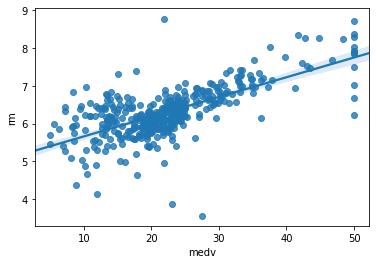

In [6]:
sns.regplot(data['medv'],data['rm'])

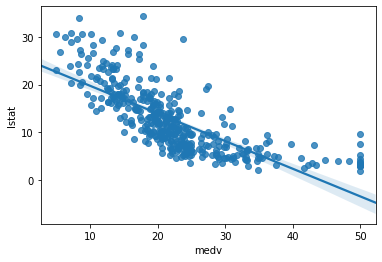

In [7]:
sns.regplot(data['medv'],data['lstat'])

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [8]:
# Is there a place where we can find the description of the variables? It's not clear what they mean. 

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [9]:
# (Already completed in the explore data fuction above). 

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [10]:
# (Already completed in the explore data fuction above). 

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance metric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [11]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return classification_report(Y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = data.drop(['medv'], axis = 1)
y = data['medv'] 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,shuffle=True)

In [21]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape) 
display(y_test.shape)

(323, 13)

(81, 13)

(323,)

(81,)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [59]:
def rand_forest(x):
    rf = RandomForestRegressor(n_estimators = 1000,max_depth=x, random_state = 42)
    rf.fit(X_train, y_train)
    predictions = rf.predict(X_test)
    errors = abs(predictions - y_test)
    print('Mean Absolute Error for a max depth param of',x,'=', round(np.mean(errors), 2), 'degrees.')
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
max_depth_list = [2,4,6,8,10]
for i in max_depth_list:
    rand_forest(i)

Mean Absolute Error for a max depth param of 2 = 3.01 degrees.
Accuracy: 83.42 %.
Mean Absolute Error for a max depth param of 4 = 2.51 degrees.
Accuracy: 87.55 %.
Mean Absolute Error for a max depth param of 6 = 2.43 degrees.
Accuracy: 88.28 %.
Mean Absolute Error for a max depth param of 8 = 2.42 degrees.
Accuracy: 88.31 %.
Mean Absolute Error for a max depth param of 10 = 2.43 degrees.
Accuracy: 88.24 %.


Now, plot the score for each tree on the training set and on the testing set.

In [36]:
# Done in above function

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# the more degrees, the better the performance of the model? 

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [47]:
rand_forest(1)

Mean Absolute Error for a max depth param of 1 = 4.1 degrees.


In [ ]:
# with 1 it does suffer, with 10, we don't see much of an improvement from 8.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [64]:
for i in range(1,20):
    rand_forest(i)

Mean Absolute Error for a max depth param of 1 = 4.1 degrees.
Accuracy: 76.98 %.
Mean Absolute Error for a max depth param of 2 = 3.01 degrees.
Accuracy: 83.42 %.
Mean Absolute Error for a max depth param of 3 = 2.64 degrees.
Accuracy: 86.35 %.
Mean Absolute Error for a max depth param of 4 = 2.51 degrees.
Accuracy: 87.55 %.
Mean Absolute Error for a max depth param of 5 = 2.45 degrees.
Accuracy: 88.08 %.
Mean Absolute Error for a max depth param of 6 = 2.43 degrees.
Accuracy: 88.28 %.
Mean Absolute Error for a max depth param of 7 = 2.42 degrees.
Accuracy: 88.31 %.
Mean Absolute Error for a max depth param of 8 = 2.42 degrees.
Accuracy: 88.31 %.
Mean Absolute Error for a max depth param of 9 = 2.43 degrees.
Accuracy: 88.28 %.
Mean Absolute Error for a max depth param of 10 = 2.43 degrees.
Accuracy: 88.24 %.
Mean Absolute Error for a max depth param of 11 = 2.42 degrees.
Accuracy: 88.31 %.
Mean Absolute Error for a max depth param of 12 = 2.41 degrees.
Accuracy: 88.37 %.
Mean Absolute 

In [ ]:
# We might as well stick with a mac depth param of 7 - we don't see much more of an improvement when we add any more 

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [63]:
# The model doesn't have that much accuracy. Data from 1978 is obviously not that relevant today. And either way, we could only apply it with confidence to Boston. 